In [25]:
from PIL import Image, ImageDraw, ImageFont

# Define the image dimensions
width, height = 5000, 5000

# Create a new image with transparent background
img = Image.new('RGBA', (width, height))

# Create a draw object
draw = ImageDraw.Draw(img)

# Define the font and size
font = ImageFont.truetype('arial.ttf', size=4000)

# Define the letter
letter = 'A'

# Get the size of the letter
text_size = draw.textsize(letter, font=font)

# Calculate the width and height to center the text
x = (width - text_size[0])/2
y = (height - text_size[1])/2

# Draw the letter with a color of black and full opacity
draw.text((x, y), letter, fill='black', font=font)

# Save the image
img.save('letter_A.png')


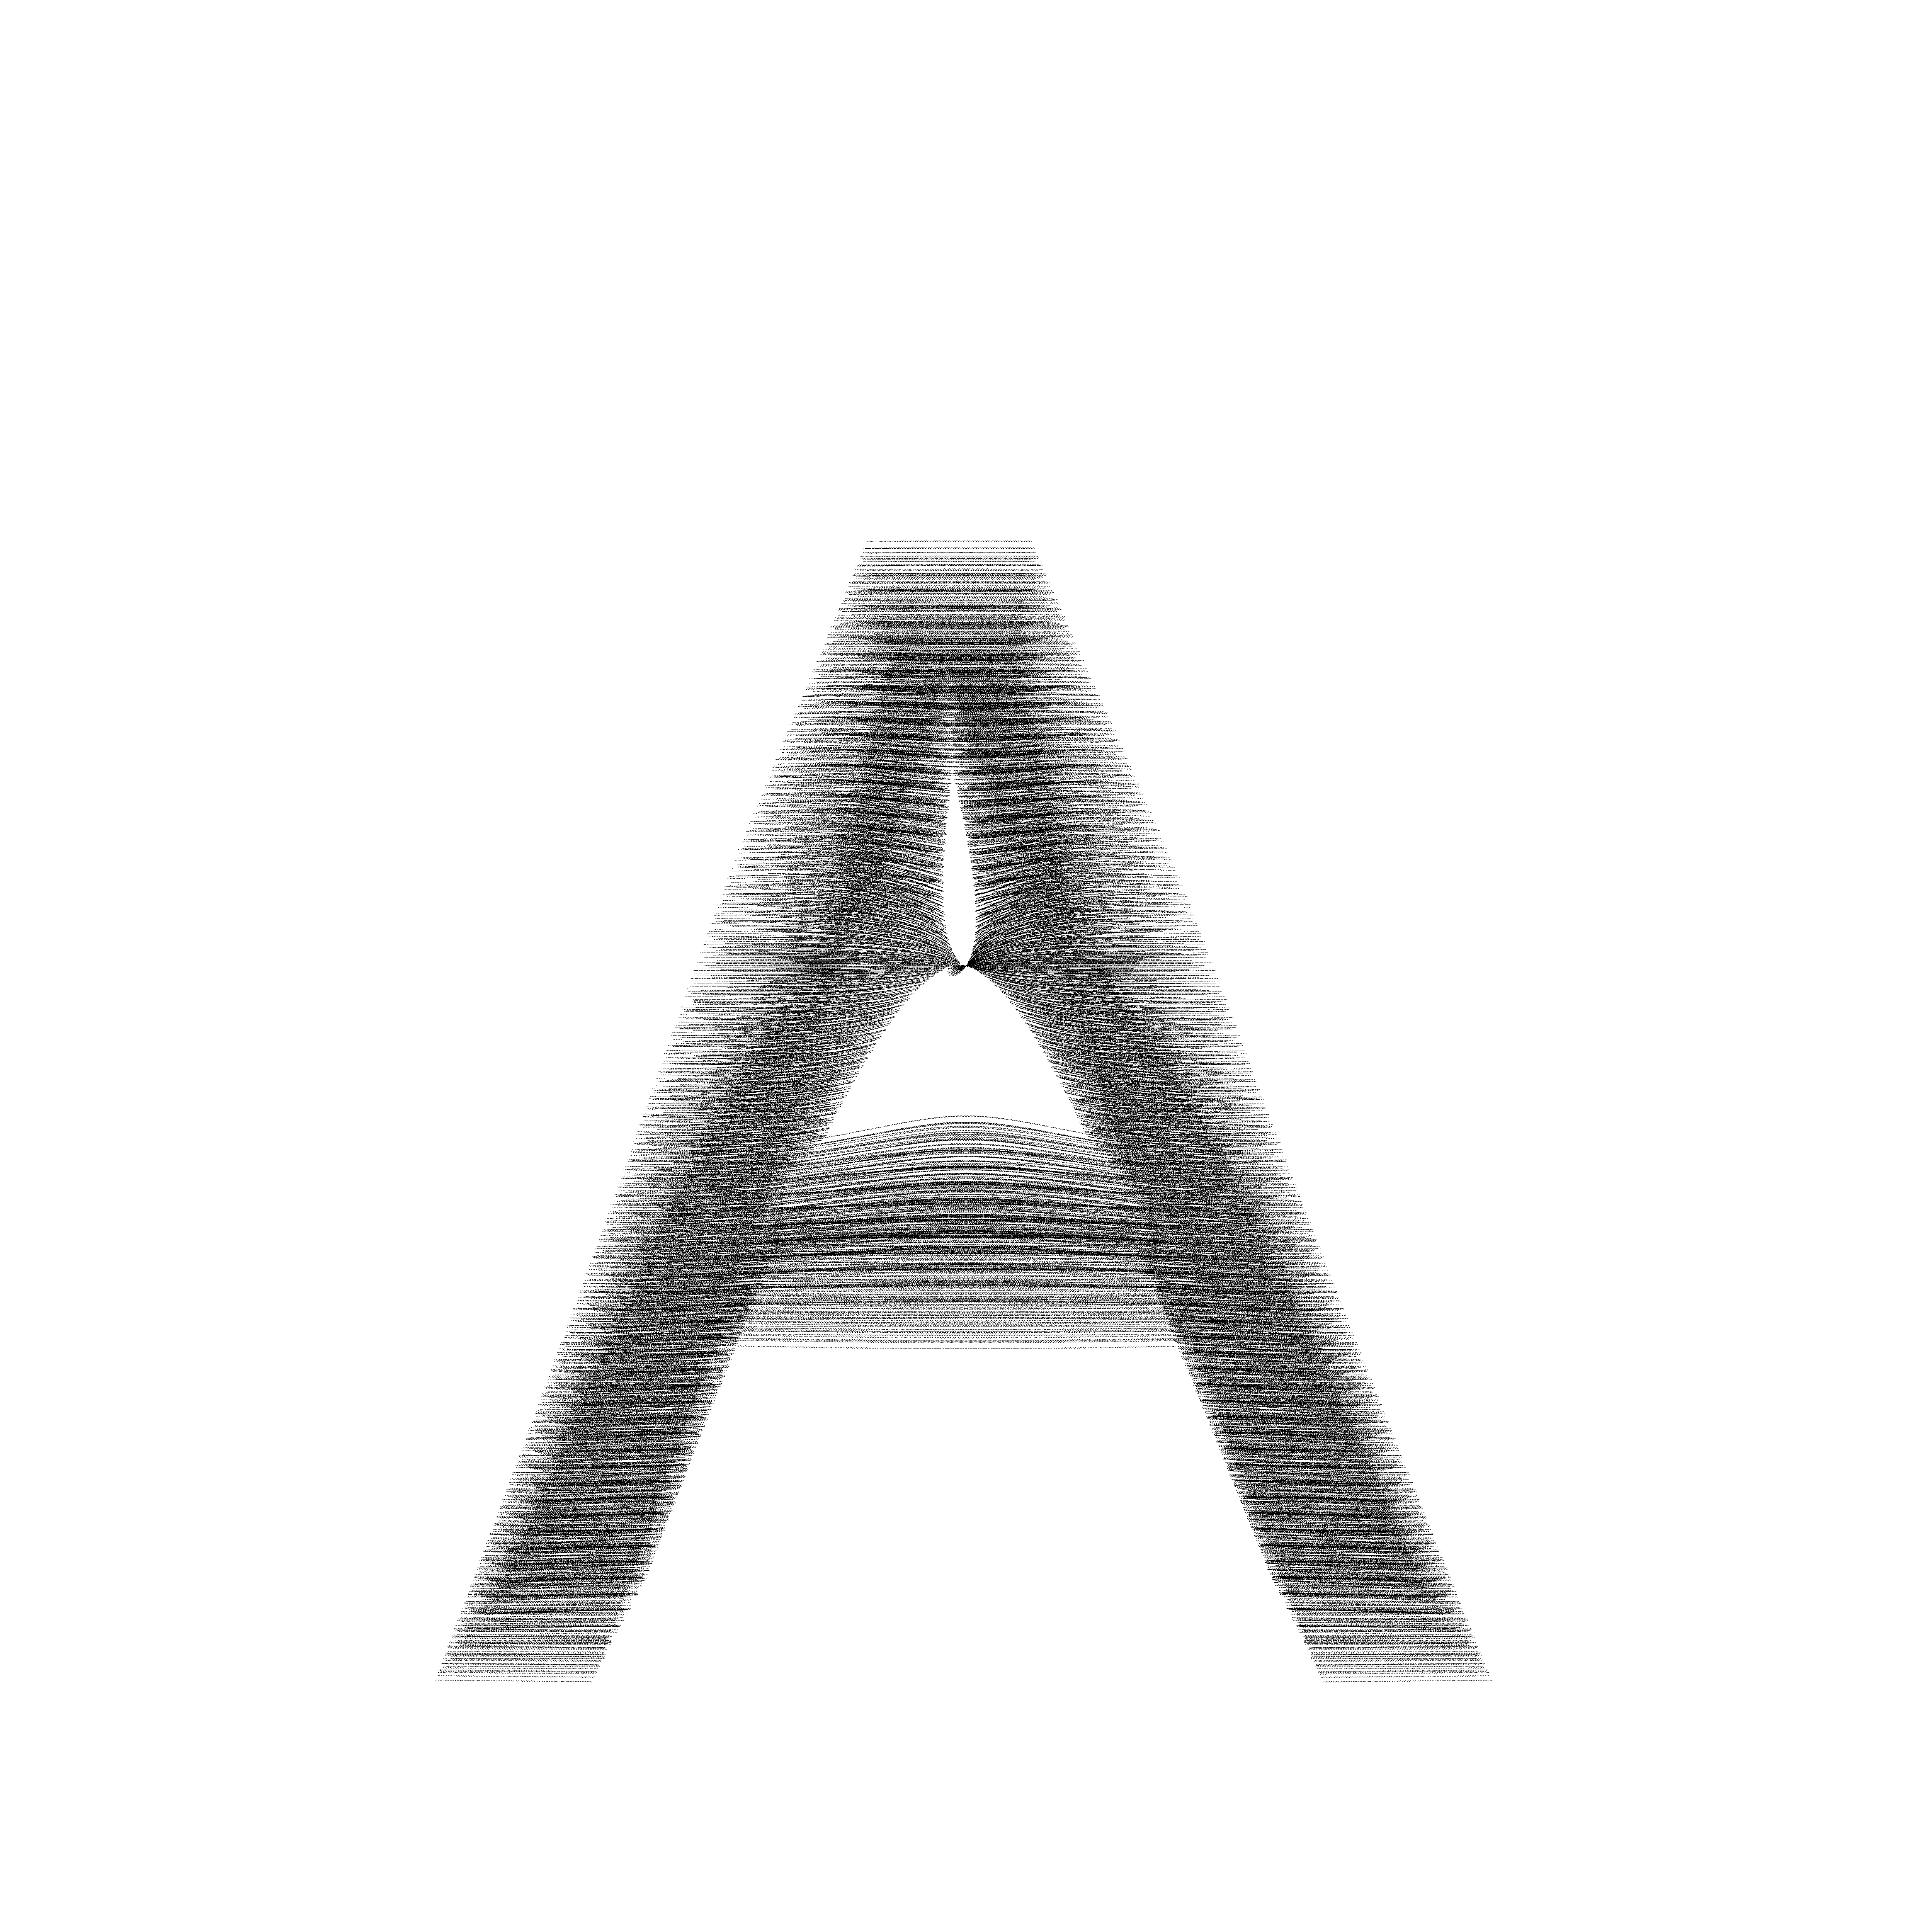

In [58]:
from PIL import Image
import numpy as np
import math

def lens_distortion(img, distortion_fn):
    w, h = img.size
    img_np = np.array(img)

    x = np.arange(w) - w/2  # x-coordinates
    y = h/2 - np.arange(h)  # y-coordinates

    X, Y = np.meshgrid(x, y)  # matrices of coordinates
    Theta = np.sqrt(X**2 + Y**2)  # matrix of radiuses (in pixels)

    # Apply the distortion
    D = distortion_fn(X,Y)

    # Calculate the distorted coordinates
    Xd = X - D*X/(Theta + 1e-8)  # small constant added to avoid division by zero
    Yd = Y - D*Y/(Theta + 1e-8) 
    Xd = np.clip(Xd + w/2, 0, w-1).astype(int)
    Yd = np.clip(h/2 - Yd, 0, h-1).astype(int)

    # Create the distorted image preserving alpha channel
    distorted_img_np = np.zeros_like(img_np)
    mask = img_np[..., 3] > 0  # mask for pixels where alpha is not zero
    distorted_img_np[Yd[mask], Xd[mask]] = img_np[mask]

    return Image.fromarray(distorted_img_np)

# Load the image
img = Image.open('letter_A.png')

# Define the distortion function
def distortion_fn(X,Y):
    return np.cos(X)-150 *np.sin(Y)+100

# Apply the distortion
distorted_img = lens_distortion(img, distortion_fn)

# Save the image
distorted_img.save('distorted_a.png')

# Display the image
display(distorted_img)


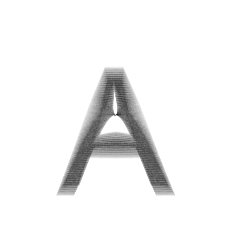

In [57]:
import matplotlib.pyplot as plt

# Load the image
distorted_img = Image.open('distorted_A.png')

# Display the image
plt.imshow(distorted_img)
plt.axis('off')  # remove the axis
plt.show()


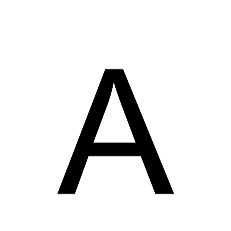

In [56]:
distorte_img = Image.open('letter_A.png')

# Display the image
plt.imshow(distorte_img)
plt.axis('off')  # remove the axis
plt.show()